# 2. Análise Exploratória e Pré-processamento

## Datasets

Os datasets serão armazenados no diretório data conforme a estrutura a seguir:

...

    ├── data                            <- Diretório de dados.
    │   ├── external                    <- Diretório de dados externos(temporário).
    │   │   └── input_video             <- Diretório para armazenar o vídeo recebido via 
    │   │                                  upload para classificação.
    │   │   
    │   ├── interim                     <- Diretório de dados em processamento (temporário).
    │   │   └── input_face              <- Diretório para armazenar os frames processados 
    │   │                                  do vídeo recebido via upload para classificação.
    │   │
    │   ├── processed                   <- Diretório de dados processados.
    │   │   ├── dataset_celebdf         <- Diretório de faces do dataset celebdf
    │   │   │   └── real_face           <- Diretório de faces reais
    │   │   │   └── fake_face           <- Diretório de faces falsas
    │   │   │
    │   │   ├── dataset_faceforensics   <- Diretório de faces do dataset faceforensics
    │   │   │   └── real_face           <- Diretório de faces reais
    │   │   │   └── fake_face           <- Diretório de faces falsas
    │   │   │
    │   │   └── dataset_dfdc            <- Diretório de faces do dataset dfdc
    │   │       └── real_face           <- Diretório de faces reais
    │   │       └── fake_face           <- Diretório de faces falsas
    │   │   
    │   └── raw                         <- Diretório de dados brutos.
    │       ├── dataset_celebdf         <- Diretório de vídeos do dataset celebdf
    │       │   └── real_video          <- Diretório de vídeos reais
    │       │   └── fake_video          <- Diretório de vídeos falsos
    │       │
    │       ├── dataset_faceforensics   <- Diretório de vídeos do dataset faceforensics
    │       │   └── real_video          <- Diretório de vídeos reais
    │       │   └── fake_video          <- Diretório de vídeos falsos
    │       │
    │       └── dataset_dfdc            <- Diretório de vídeos do dataset dfdc
    │           └── real_video          <- Diretório de vídeos reais
    │           └── fake_video          <- Diretório de vídeos falsos
...

In [1]:
# Bibliotecas
import pandas as pd
from glob import glob
import cv2
import numpy as np
from IPython.display import HTML
from base64 import b64encode
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

### Captura de frames

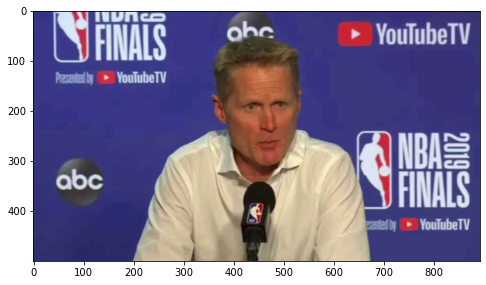

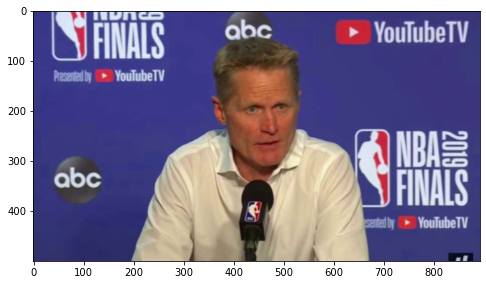

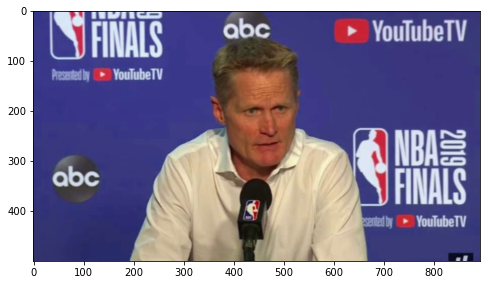

In [2]:
# Captura de Frames:
dataset = 'celebdf'
videos_reais = glob("../data/raw/dataset_"+ dataset +"/real_video/*.mp4")
count = 0
cap = cv2.VideoCapture(videos_reais[15])
ret,frame = cap.read()

while count < 3:
    cap.set(cv2.CAP_PROP_POS_MSEC,(count*1000))   
    ret,frame = cap.read()
    if count == 0:
        image0 = frame
    elif count == 1:
        image1 = frame
    elif count == 2:
        image2 = frame
    count = count + 1

def display_img(img):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)

frames_capturados = [image0,image1,image2]
for i in frames_capturados: display_img(i)

### Detecção de faces

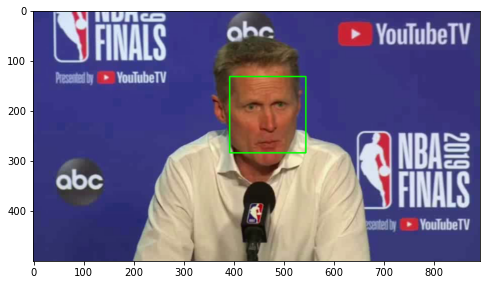

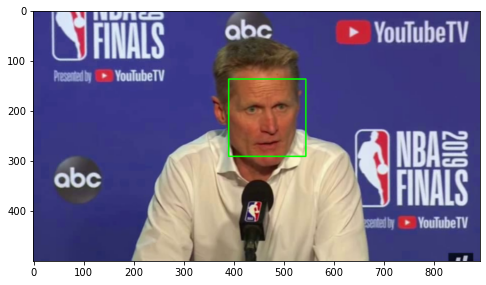

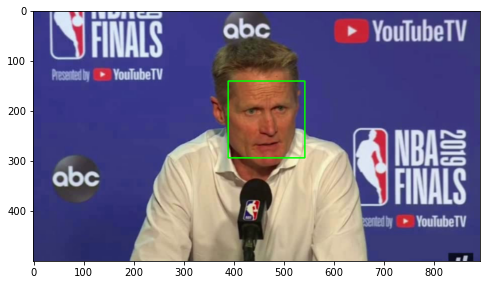

In [3]:
face_cascade = cv2.CascadeClassifier('../src/features/haarcascades/haarcascade_frontalface_default.xml')
def detect_face(img):   
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.3, minNeighbors=5) 
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (0,255,0), 2)    
    return face_img

for i in frames_capturados: display_img(detect_face(i))

### Região de interesse

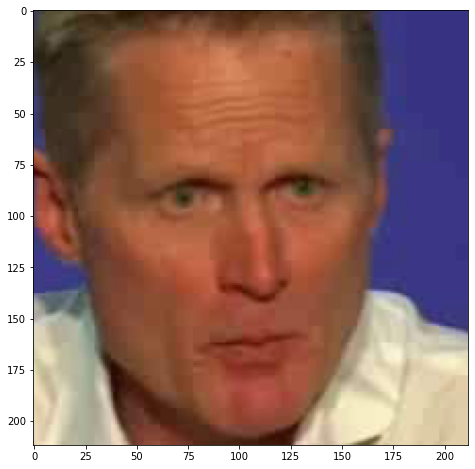

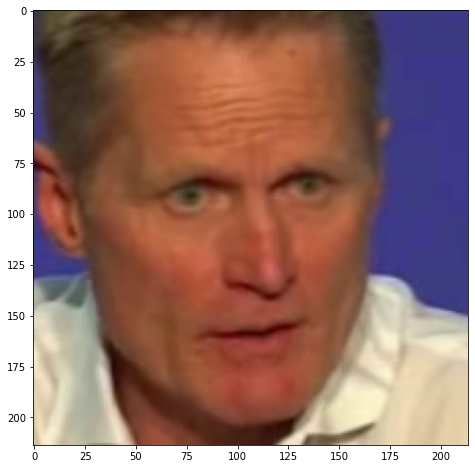

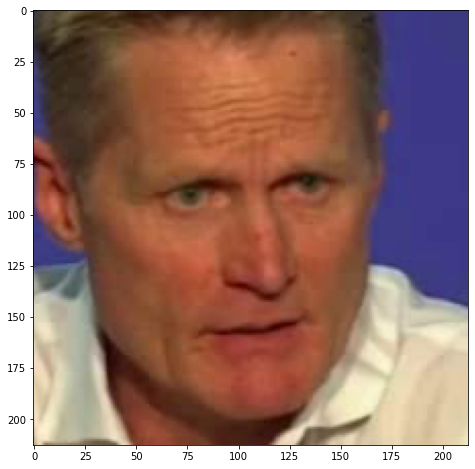

In [4]:
#ROI
def ROI(img):
    offset = 30 
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.3, minNeighbors=5) 
    for (x,y,w,h) in face_rects: 
        roi = face_img[y-offset:y+h+offset,x-offset:x+w+offset] 
    return roi

for i in frames_capturados: display_img( ROI(i))

### Função para aplicar a todos os videos:

In [5]:
# Save Faces:
def save_faces(dataset,categoria,lista_videos):
    for i in lista_videos: 
        cap = cv2.VideoCapture(i)
        ret,frame = cap.read()
        count = 0
        try:
            while count < 11:
                cap.set(cv2.CAP_PROP_POS_MSEC,(count*1000))   
                ret,frame = cap.read()
                image0 = frame
                image0 = ROI(image0)
                arquivo = i.replace("../data/raw/dataset_","").replace(dataset+"/"+categoria+"/","").replace(".mp4","")
                arquivo_nome = "../data/processed/dataset_" + dataset +"/"+ categoria+ "/" + arquivo + "_" + str(count) + ".jpg"
                cv2.imwrite(arquivo_nome,image0)
                count = count + 1
        except:
            pass
    



In [6]:
# Celebdf
## Reais
dataset = 'celebdf'
pasta = 'real_video'
categoria = 'real_face'
lista_videos = glob("../data/raw/dataset_"+ dataset +"/"+pasta+"/*.mp4")
save_faces(dataset,categoria,lista_videos)
## Fakes
dataset = 'celebdf'
pasta = 'real_video'
categoria = 'fake_face'
lista_videos = glob("../data/raw/dataset_"+ dataset +"/"+pasta+"/*.mp4")
save_faces(dataset,categoria,lista_videos)

In [7]:
# faceforensics
## Reais
dataset = 'faceforensics'
pasta = 'real_video'
categoria = 'real_face'
lista_videos = glob("../data/raw/dataset_"+ dataset +"/"+pasta+"/*.mp4")
save_faces(dataset,categoria,lista_videos)
## Fakes
dataset = 'faceforensics'
pasta = 'fake_video'
categoria = 'fake_face'
lista_videos = glob("../data/raw/dataset_"+ dataset +"/"+pasta+"/*.mp4")
save_faces(dataset,categoria,lista_videos)

In [8]:
# dfdc
## Reais
dataset = 'dfdc'
pasta = 'real_video'
categoria = 'real_face'
lista_videos = glob("../data/raw/dataset_"+ dataset +"/"+pasta+"/*.mp4")
save_faces(dataset,categoria,lista_videos)
## Fakes
dataset = 'dfdc'
pasta = 'fake_video'
categoria = 'fake_face'
lista_videos = glob("../data/raw/dataset_"+ dataset +"/"+pasta+"/*.mp4")
save_faces(dataset,categoria,lista_videos)

### Divisão Treino e Teste

In [84]:
# categorizacao dos videos em treino e teste
for dataset in ['celebdf','faceforensics','dfdc']:
    arquivo_metadados = "../data/raw/dataset_"+ dataset +"/metadados.csv"
    #print(arquivo_metadados)
    metadados = pd.read_csv(arquivo_metadados, sep=';',dtype=str)
    #display(metadados.head())
    #metadados = metadados.reset_index()
    x = metadados.drop(columns=['label'])
    y = metadados['label']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42, stratify=y)
    treino = x_train.copy()
    treino['label'] = y_train
    treino['particao'] = 'treino'
    teste = x_test.copy()
    teste['label'] = y_test
    teste['particao'] = 'teste'
    #display(treino)
    #display(teste)
    metadados_id_part = pd.concat([treino,teste])
    metadados_id_part = metadados_id_part.reset_index(drop=True)
    metadados_id_part['video'] = metadados_id_part['video'].str.split("/",expand=True)[5]
    metadados_id_part['video'] = metadados_id_part['video'].astype(str)
    metadados_id_part.to_csv("../data/processed/dataset_"+ dataset +"/metadados_videos.csv",sep=";", index=False)
    print('-'*50)
    print(dataset)
    display(metadados_id_part.head())
    display(metadados_id_part['particao'].value_counts())
    del metadados_id_part



--------------------------------------------------
celebdf


,video,descricao,label,particao
0,id30_id29_0007.mp4,FAKE,0,treino
1,id2_id23_0003.mp4,FAKE,0,treino
2,id37_id29_0000.mp4,FAKE,0,treino
3,id1_id35_0009.mp4,FAKE,0,treino
4,id53_id51_0007.mp4,FAKE,0,treino


treino    4570
teste     1959
Name: particao, dtype: int64

--------------------------------------------------
faceforensics


,video,descricao,label,particao
0,fs_087_081.mp4,FAKE,0,treino
1,nt_266_252.mp4,FAKE,0,treino
2,246.mp4,REAL,1,treino
3,fs_111_094.mp4,FAKE,0,treino
4,nt_431_447.mp4,FAKE,0,treino


treino    3500
teste     1500
Name: particao, dtype: int64

--------------------------------------------------
dfdc


,video,descricao,label,particao
0,bilnggbxgu.mp4,REAL,1,treino
1,andaxzscny.mp4,FAKE,0,treino
2,tejfudfgpq.mp4,REAL,1,treino
3,emfbhytfhc.mp4,FAKE,0,treino
4,aneclqfpbt.mp4,FAKE,0,treino


treino    560
teste     240
Name: particao, dtype: int64

In [96]:
len(dataframe_faces)

59208

In [110]:
# Lista de faces:
for dataset in ['celebdf','faceforensics','dfdc']:
#for dataset in ['celebdf']:
    faces_reais = glob("../data/processed/dataset_"+ dataset +"/real_face/*.jpg")
    faces_fakes = glob("../data/processed/dataset_"+ dataset +"/fake_face/*.jpg")
    dataframe_faces_reais =  pd.DataFrame( data = {"face": faces_reais, "label" : "1", "descricao": "REAL"})
    dataframe_faces_fakes =  pd.DataFrame( data = {"face": faces_fakes, "label" : "0", "descricao": "FAKE"})
    dataframe_faces = pd.concat([dataframe_faces_reais, dataframe_faces_fakes])
    dataframe_faces['video'] = dataframe_faces['face'].str.split("/",expand=True)[5]
    dataframe_faces['video'] = dataframe_faces['video'].str.replace(r'(_[0-9]+.jpg)','',regex=True)
    dataframe_faces['video']  = dataframe_faces['video'] + ".mp4"
    metadados_video = pd.read_csv("../data/processed/dataset_"+ dataset +"/metadados_videos.csv", sep=';',dtype=str)
    dataframe_faces = pd.merge(dataframe_faces,metadados_video, on=['video','label','descricao'], how='left' )
    dataframe_faces.to_csv("../data/processed/dataset_"+ dataset +"/metadados_faces.csv",sep=";", index=False)
    print('-'*50)
    print(dataset)
    display(dataframe_faces.head())
    display(dataframe_faces['particao'].value_counts(dropna=False))

--------------------------------------------------
celebdf


,face,label,descricao,video,particao
0,../data/processed/dataset_celebdf/real_face/00...,1,REAL,00001.mp4,treino
1,../data/processed/dataset_celebdf/real_face/00...,1,REAL,00001.mp4,treino
2,../data/processed/dataset_celebdf/real_face/00...,1,REAL,00001.mp4,treino
3,../data/processed/dataset_celebdf/real_face/00...,1,REAL,00001.mp4,treino
4,../data/processed/dataset_celebdf/real_face/00...,1,REAL,00001.mp4,treino


treino    41607
teste     17601
Name: particao, dtype: int64

--------------------------------------------------
faceforensics


,face,label,descricao,video,particao
0,../data/processed/dataset_faceforensics/real_f...,1,REAL,001.mp4,teste
1,../data/processed/dataset_faceforensics/real_f...,1,REAL,001.mp4,teste
2,../data/processed/dataset_faceforensics/real_f...,1,REAL,001.mp4,teste
3,../data/processed/dataset_faceforensics/real_f...,1,REAL,001.mp4,teste
4,../data/processed/dataset_faceforensics/real_f...,1,REAL,001.mp4,teste


treino    34928
teste     15005
Name: particao, dtype: int64

--------------------------------------------------
dfdc


,face,label,descricao,video,particao
0,../data/processed/dataset_dfdc/real_face/aelfn...,1,REAL,aelfnikyqj.mp4,treino
1,../data/processed/dataset_dfdc/real_face/aelfn...,1,REAL,aelfnikyqj.mp4,treino
2,../data/processed/dataset_dfdc/real_face/aelfn...,1,REAL,aelfnikyqj.mp4,treino
3,../data/processed/dataset_dfdc/real_face/aelfn...,1,REAL,aelfnikyqj.mp4,treino
4,../data/processed/dataset_dfdc/real_face/aelfn...,1,REAL,aelfnikyqj.mp4,treino


treino    2558
teste     1220
Name: particao, dtype: int64

***
### Dataset de Misto:

In [18]:
# Leitura dos arquivos de metadados de cada dataset
metadados_celebdf = pd.read_csv("../data/processed/dataset_celebdf/metadados_faces.csv", sep=';',dtype=str)
metadados_faceforensics = pd.read_csv("../data/processed/dataset_faceforensics/metadados_faces.csv", sep=';',dtype=str)
metadados_dfdc = pd.read_csv("../data/processed/dataset_dfdc/metadados_faces.csv", sep=';',dtype=str)
# Junção dos 3 datasets:
metadados_todos = pd.concat([metadados_celebdf,metadados_faceforensics,metadados_dfdc])
metadados_todos = metadados_todos.reset_index(drop=True)
metadados_todos.drop(columns=['particao'], inplace=True)
metadados_todos.shape

(112919, 4)

In [19]:
# amostra:
metadados_todos['dataset'] = metadados_todos['face'].str.split('/', expand=True)[3]
metadados_todos['dataset'] = metadados_todos['dataset'].str.replace('dataset_','')
metadados_todos.head()

,face,label,descricao,video,dataset
0,../data/processed/dataset_celebdf/real_face/00...,1,REAL,00001.mp4,celebdf
1,../data/processed/dataset_celebdf/real_face/00...,1,REAL,00001.mp4,celebdf
2,../data/processed/dataset_celebdf/real_face/00...,1,REAL,00001.mp4,celebdf
3,../data/processed/dataset_celebdf/real_face/00...,1,REAL,00001.mp4,celebdf
4,../data/processed/dataset_celebdf/real_face/00...,1,REAL,00001.mp4,celebdf


In [20]:
# verificando desbalanceamento
metadados_todos_videos = metadados_todos[['label','descricao','video','dataset']]
metadados_todos_videos = metadados_todos_videos.drop_duplicates(keep='first')
metadados_todos_videos['descricao'].value_counts()

FAKE    9525
REAL    1959
Name: descricao, dtype: int64

In [21]:
# Geração de um dataset balanceado(50% fakes e 50% reais)
tamanho_reais = len(metadados_todos_videos[metadados_todos_videos['descricao']=='REAL'])
videos_reais = metadados_todos_videos[metadados_todos_videos['descricao']=='REAL']
videos_fakes = metadados_todos_videos[metadados_todos_videos['descricao']=='FAKE']
videos_fakes = videos_fakes.sample(frac = 1).head(tamanho_reais)
metadados_dataset_misto = pd.concat([videos_fakes,videos_reais])
metadados_dataset_misto = metadados_dataset_misto.reset_index(drop=True)
# verificando balanceamento
metadados_dataset_misto['descricao'].value_counts()

FAKE    1959
REAL    1959
Name: descricao, dtype: int64

In [22]:
# Particionamento treino e teste
x = metadados_dataset_misto.drop(columns=['label'])
y = metadados_dataset_misto['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42, stratify=y)
treino = x_train.copy()
treino['label'] = y_train
treino['particao'] = 'treino'
teste = x_test.copy()
teste['label'] = y_test
teste['particao'] = 'teste'
metadados_id_part = pd.concat([treino,teste])
metadados_id_part = metadados_id_part.reset_index(drop=True)
dataset_misto = pd.merge(metadados_todos, metadados_id_part, how='left', on=['descricao','video','dataset','label'])
dataset_misto = dataset_misto[dataset_misto['particao'].isnull()==False]
dataset_misto = dataset_misto.sample(frac = 1).reset_index(drop=True)
dataset_misto.to_csv("../data/processed/dataset_misto/metadados_faces.csv",sep=";", index=False)
dataset_misto.head()

,face,label,descricao,video,dataset,particao
0,../data/processed/dataset_faceforensics/real_f...,1,REAL,878.mp4,faceforensics,treino
1,../data/processed/dataset_faceforensics/real_f...,1,REAL,459.mp4,faceforensics,treino
2,../data/processed/dataset_faceforensics/real_f...,1,REAL,055.mp4,faceforensics,treino
3,../data/processed/dataset_celebdf/real_face/id...,1,REAL,id13_0009.mp4,celebdf,teste
4,../data/processed/dataset_celebdf/real_face/id...,1,REAL,id8_0009.mp4,celebdf,treino
